<a href="https://colab.research.google.com/github/Shreya4225/Data-analysis-on-amazon-watches/blob/main/Copy_of_amazon_watches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import required Libraries



In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Data Scraping

In [ ]:
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find('span' , attrs= {"id": 'productTitle'})
        # Inner NavigatableString Object
        title_value = title.text
        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

In [ ]:
def get_price(soup):

    try:
        price = soup.find('span' , attrs= {"class": 'a-price-whole'}).text.strip()

    except:
       price = ""

    return price

In [ ]:
def get_rating(soup):

    try:
        rating = soup.find('span' , attrs= {"class": 'a-icon-alt'}).string.strip()
    except:
        rating = ""

    return rating

In [ ]:
def get_reviews(soup):

    try:
        reviews = soup.find('span' , attrs= {"class": 'a-size-base'}).string.strip()
    except:
        reviews = ""

    return reviews

In [ ]:
def get_availability(soup):

    try:
        availability = soup.find('span' , attrs= {"class": 'a-size-medium a-color-success'}).text.strip()

    except:
       availability = ""

    return availability

In [ ]:
HEADERS=({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36',
          'Accept-Language': 'en-Us, en;q=0.5'})
url= 'https://www.amazon.in/s?k=watches&crid=A1161P4TISB8&sprefix=watches%2Caps%2C356&ref=nb_sb_noss_1'
webpage= requests.get(url,headers= HEADERS )
soup= BeautifulSoup(webpage.content, 'html.parser')
links= soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
links_list = []
for link in links:
    links_list.append(link.get('href'))

d = {"title":[], "price":[], "rating":[], "availability":[], "reviews":[]}
for link in links_list:
    new_webpage= requests.get("https://www.amazon.in/" + link,headers= HEADERS )
    new_soup = BeautifulSoup(new_webpage.content, "html.parser")
    d['title'].append(get_title(new_soup))
    d['price'].append(get_price(new_soup))
    d['rating'].append(get_rating(new_soup))
    d['availability'].append(get_availability(new_soup))
    d['reviews'].append(get_reviews(new_soup))
amazon_df1 = pd.DataFrame.from_dict(d)
amazon_df1.to_csv("amazon_data.csv", header=True, index=False)

In [ ]:
amazon_df=amazon_df1

In [ ]:
amazon_df

,title,price,rating,availability,reviews
0,Noise Twist Round dial Smart Watch with Blueto...,"1,399.",4.1 out of 5 stars,In stock,
1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...","1,299.",4.1 out of 5 stars,In stock,
2,"boAt Xtend Smart Watch with Alexa Built-in, 1....",999.,4.1 out of 5 stars,In stock,
3,,,,,
4,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,"1,199.",4.2 out of 5 stars,In stock,
5,"boAt Xtend Smart Watch with Alexa Built-in, 1....",999.,4.1 out of 5 stars,In stock,
6,Casio Vintage Digital Grey Dial Unisex A-158WA...,"1,695",4.4 out of 5 stars,In stock,4.4
7,Fire-Boltt Ninja Call Pro Smart Watch Dual Chi...,"1,199.",4.1 out of 5 stars,In stock,
8,"boAt Wave Ultima Max Smart Watch with 1.9"" & 2...",999.,3.6 out of 5 stars,In stock,
9,"boAt Xtend Smart Watch with Alexa Built-in, 1....",999.,4.1 out of 5 stars,In stock,


#Data Analysing

In [ ]:
amazon_df.shape

(50, 5)

In [ ]:
amazon_df.describe()

,title,price,rating,availability,reviews
count,50,50,50,50,50
unique,47,32,13,2,9
top,Fire-Boltt Ninja Call Pro Max 2.01” Display Sm...,"1,299.",4.1 out of 5 stars,In stock,
freq,3,5,21,47,34


#Data cleaning

In [ ]:
amazon_df['price'] = amazon_df['price'].str.replace(',', '').str.replace('.', '')

# Convert the 'price' column to numeric by removing the ','
amazon_df['price'] = pd.to_numeric(amazon_df['price'])
amazon_df

In [ ]:
amazon_df['reviews'].replace('', np.nan, inplace=True)
amazon_df

In [ ]:
amazon_df['reviews'].isnull()

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15    False
16     True
17     True
18     True
19     True
20     True
21    False
22    False
23     True
24     True
25    False
26     True
27    False
28     True
29     True
30     True
31    False
32    False
33    False
34    False
35     True
36    False
37     True
38     True
39     True
40     True
41     True
42    False
43     True
44    False
45     True
46    False
47    False
48    False
49     True
Name: reviews, dtype: bool

####The reviews column contains maximum null values, thus its better to remove the column to further decrease the complexity for data analysis.

In [ ]:
amazon_df.drop(columns=['reviews'], inplace=True)

In [ ]:
#replacing all the missing values with nan values to remove them, as we cannot apply drop null on string values
amazon_df['title'].replace('', np.nan, inplace=True)
amazon_df['availability'].replace('', np.nan, inplace=True)
amazon_df['rating'].replace('', np.nan, inplace=True)

In [ ]:
amazon_df.head()

,title,price,rating,availability
0,Noise Twist Round dial Smart Watch with Blueto...,1399.0,4.1 out of 5 stars,In stock
1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",1299.0,4.1 out of 5 stars,In stock
2,"boAt Xtend Smart Watch with Alexa Built-in, 1....",999.0,4.1 out of 5 stars,In stock
3,NaN,NaN,NaN,NaN
4,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,1199.0,4.2 out of 5 stars,In stock


In [ ]:
amazon_df

In [ ]:
amazon_df.isna().sum()

title           2
price           2
rating          2
availability    3
dtype: int64

In [ ]:
amazon_df.dropna(inplace=True)
amazon_df

In [ ]:
amazon_df.shape

(47, 4)

In [ ]:
amazon_df.dtypes

title            object
price           float64
rating           object
availability     object
dtype: object

####For analysis purpose, we require the rating data in numeric form, since in the current dataset, the rating values are in the string form, we convert it to float values, giving us rating only out of 5.

In [ ]:
# Extract numeric values from the 'rating' column
amazon_df['rating'] = amazon_df['rating'].str.extract(r'([\d.]+)').astype(float)
amazon_df

In [ ]:
amazon_df.dropna(inplace=True)
amazon_df

In [ ]:
amazon_df.availability.value_counts()

availability
In stock    47
Name: count, dtype: int64

#Data Visualization

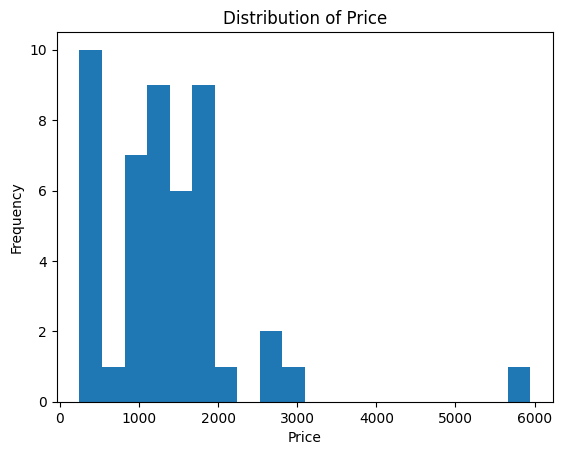

In [ ]:
# Histogram of price
plt.hist(amazon_df['price'], bins=20)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
ratings_col=amazon_df.rating.value_counts()
fig= px.pie(labels=ratings_col.index, values=ratings_col.values, title='Price according to rating', names=ratings_col.index)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

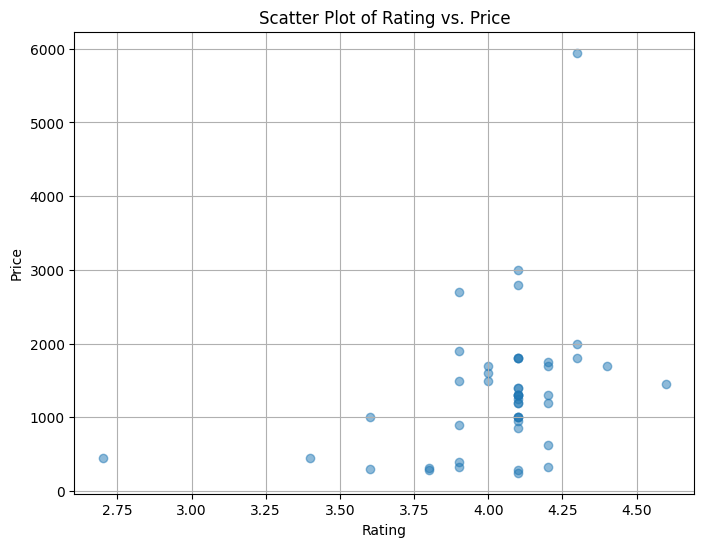

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(amazon_df['rating'], amazon_df['price'], alpha=0.5)
plt.title('Scatter Plot of Rating vs. Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [ ]:
# Correlation matrix
correlation = amazon_df['rating'].corr(amazon_df['price'])
print("Correlation coefficient between rating and price:", correlation)


Correlation coefficient between rating and price: 0.35185247729482755


In [ ]:
scatter=px.scatter(amazon_df, x='rating', y='price', title='Price Concentration', size='rating', hover_name= amazon_df.index, color='rating')
scatter.show()

In [ ]:
avg_price_by_availability = amazon_df.groupby('availability')['price'].mean()
print(avg_price_by_availability)

availability
In stock    1346.319149
Name: price, dtype: float64


In [ ]:
avg_price_by_rating = amazon_df.groupby('rating')['price'].mean()
print(avg_price_by_rating)

rating
2.7     449.000000
3.4     449.000000
3.6     649.000000
3.8     304.000000
3.9    1285.666667
4.0    1599.000000
4.1    1341.619048
4.2    1150.666667
4.3    3246.666667
4.4    1695.000000
4.6    1449.000000
Name: price, dtype: float64


In [ ]:
amazon_df.describe()

,price,rating
count,47.000000,47.000000
mean,1346.319149,4.031915
std,954.527703,0.283692
min,249.000000,2.700000
25%,874.500000,3.950000
50%,1299.000000,4.100000
75%,1699.000000,4.100000
max,5946.000000,4.600000


####Since all the values for the availability column are the same (in stock), therefore its not going to help in data analysis or correlation, so we drop this column.

In [ ]:
# Drop the 'availability' column
amazon_df.drop(columns=['availability'], inplace=True)

#Outlier Detection

###We are using Interquartile range for outlier detection

In [ ]:
# Calculate the Interquartile Range (IQR)
Q1_price = amazon_df['price'].quantile(0.25)
Q3_price = amazon_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define the threshold for outliers
threshold_price = 1.5 * IQR_price

# Identify outliers in the 'price' column
outliers_price = amazon_df[(amazon_df['price'] < (Q1_price - threshold_price)) | (amazon_df['price'] > (Q3_price + threshold_price))]
outliers_price

,title,price,rating
17,Noise ColorFit Ultra 3 Bluetooth Calling Smart...,2999.0,4.1
46,Fossil Decker Brown Watch,5946.0,4.3


###Plotting graph before outlier removal

Text(0, 0.5, 'Density')

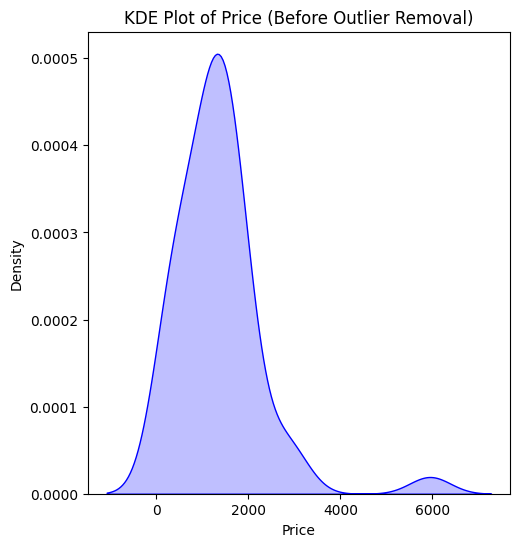

In [ ]:
plt.figure(figsize=(12, 6))

# Plot KDE plot of price before outlier removal
plt.subplot(1, 2, 1)
sns.kdeplot(amazon_df['price'], fill=True, color='blue', label='Before Outlier Removal')
plt.title('KDE Plot of Price (Before Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Density')

#Outlier Removal

In [ ]:
amazon_df_cleaned = amazon_df[~((amazon_df['price'] < (Q1_price - threshold_price)) | (amazon_df['price'] > (Q3_price + threshold_price)))]
amazon_df_cleaned.describe()

,price,rating
count,45.000000,45.000000
mean,1207.377778,4.024444
std,624.400341,0.286955
min,249.000000,2.700000
25%,850.000000,3.900000
50%,1299.000000,4.100000
75%,1695.000000,4.100000
max,2799.000000,4.600000


###Plotting graph after outlier removal

Text(0, 0.5, 'Density')

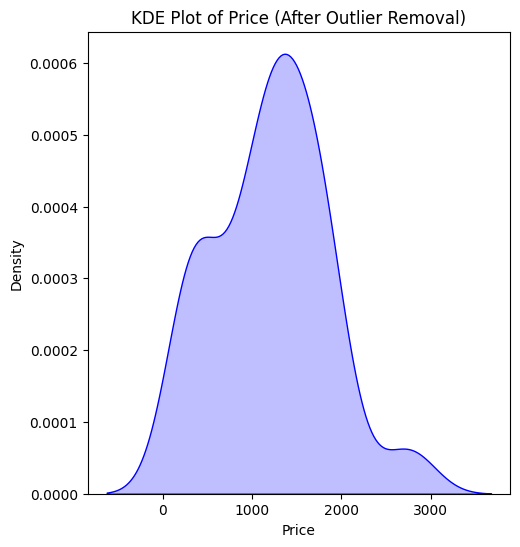

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(amazon_df_cleaned['price'], fill=True, color='blue', label='After Outlier Removal')
plt.title('KDE Plot of Price (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Density')

#Model building for price prediction

In the below step, we tried to implement a linear regression model to predict the prices of the product based on the rating, but since the dataset contains very few values, we get a very huge error.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into train and test sets
X = amazon_df_cleaned[['rating']]  # Feature variable
y = amazon_df_cleaned['price']             # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 363479.7844224686
R^2 Score: 0.0010498309485601487
